<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 10 | Descritiva II - Análise descritiva para resposta contínua | Exercício 3
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


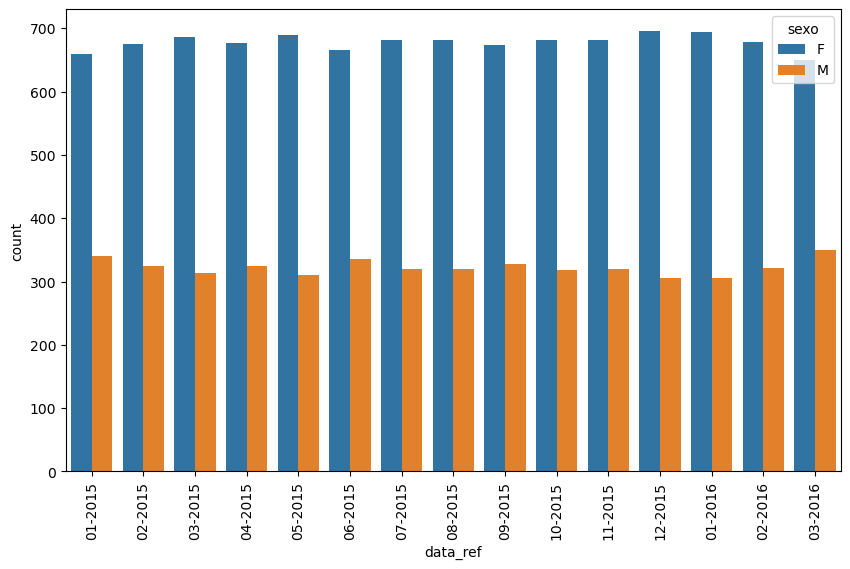

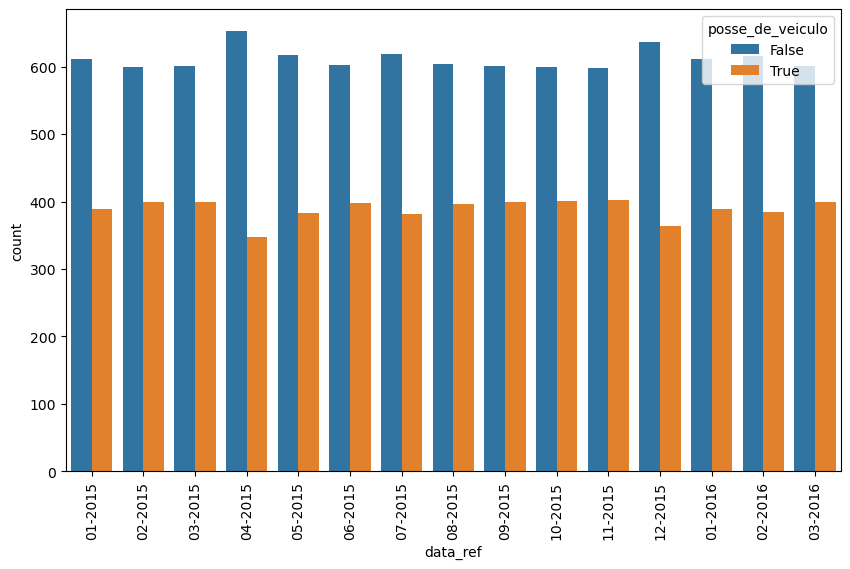

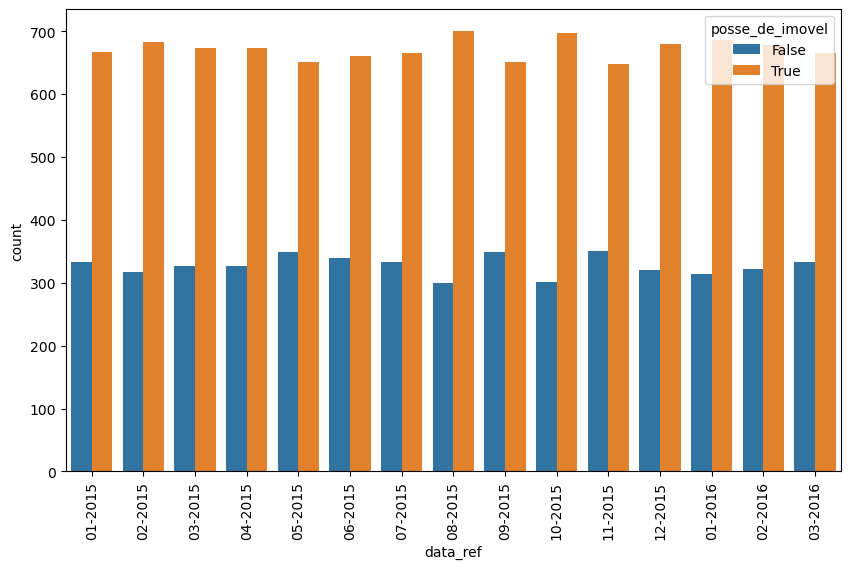

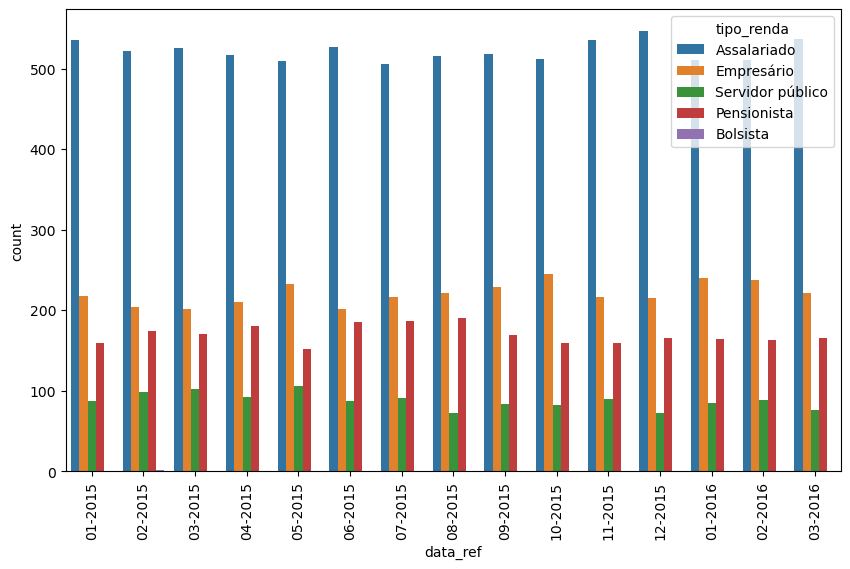

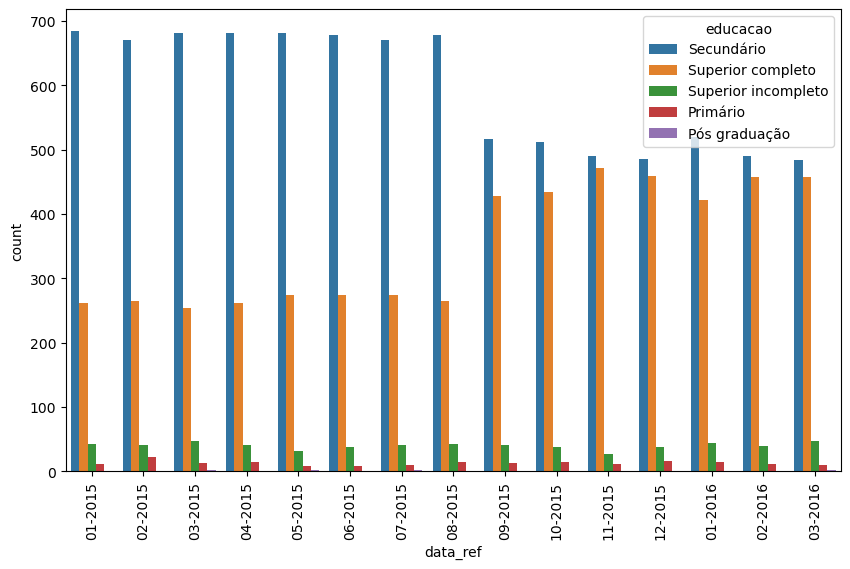

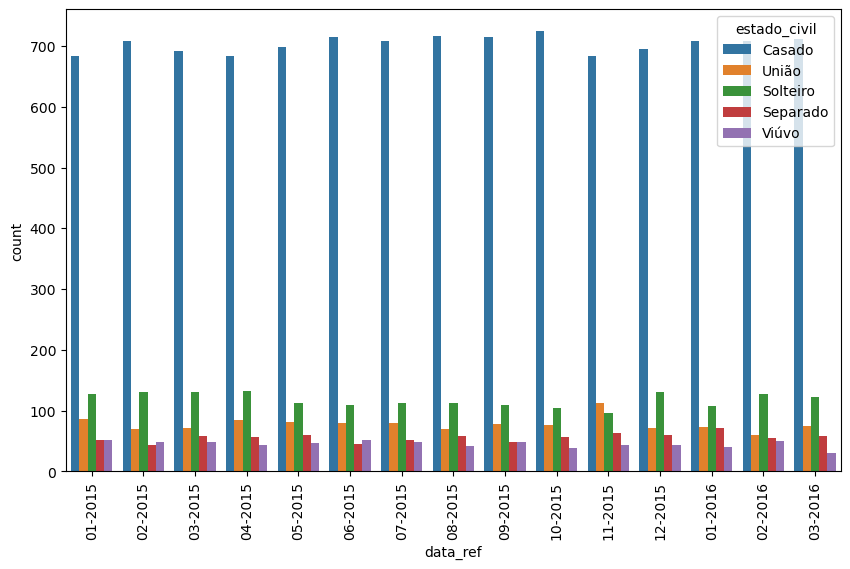

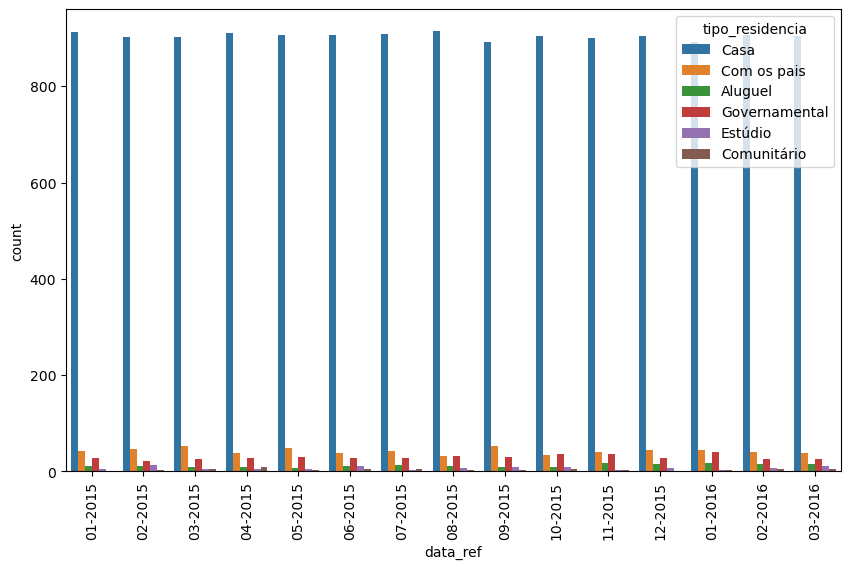

In [79]:
df_1 = df[['sexo', 'posse_de_veiculo', 'posse_de_imovel',
           'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']].copy()

for col in df_1:
    
    plt.rc('figure', figsize=(10,6))
    fig, axes = plt.subplots(1,1)

    ax1 = sns.countplot(x='data_ref', hue=col, data=df)
    tick_labs = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
    labels = ax1.set_xticklabels(tick_labs, rotation=90)

Dos gráficos plotados, o que houve alguma alteração importante a ser investigada seria o que representa a variável ```educacao```. A partir de 09-2015, houve um aumento significativo de pessoas com nível superior completo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

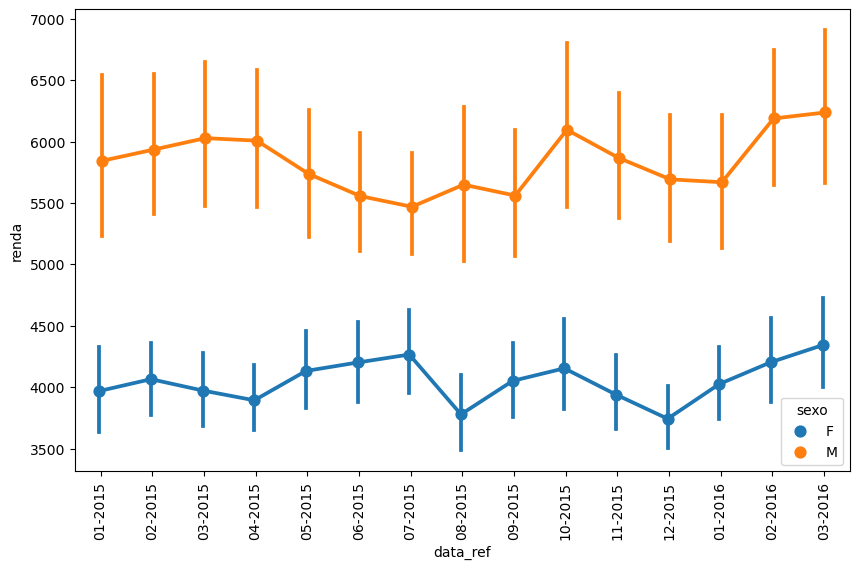

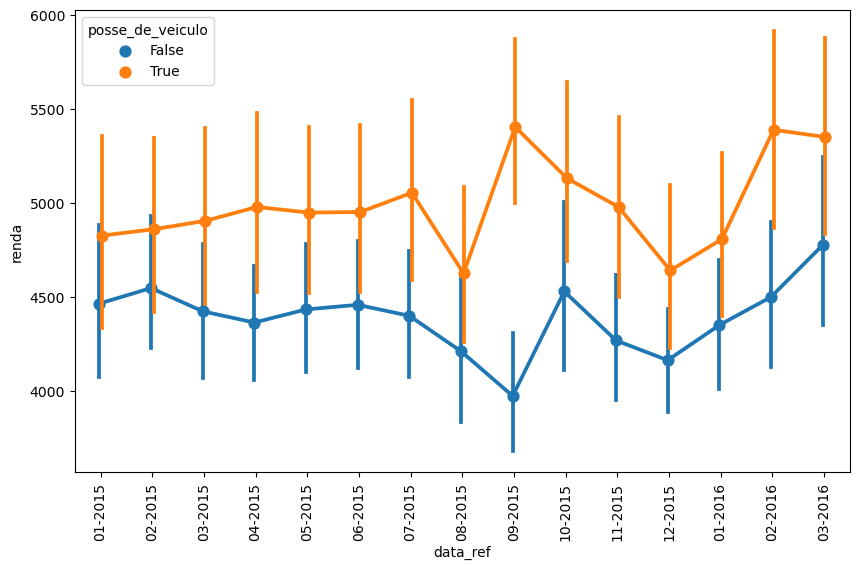

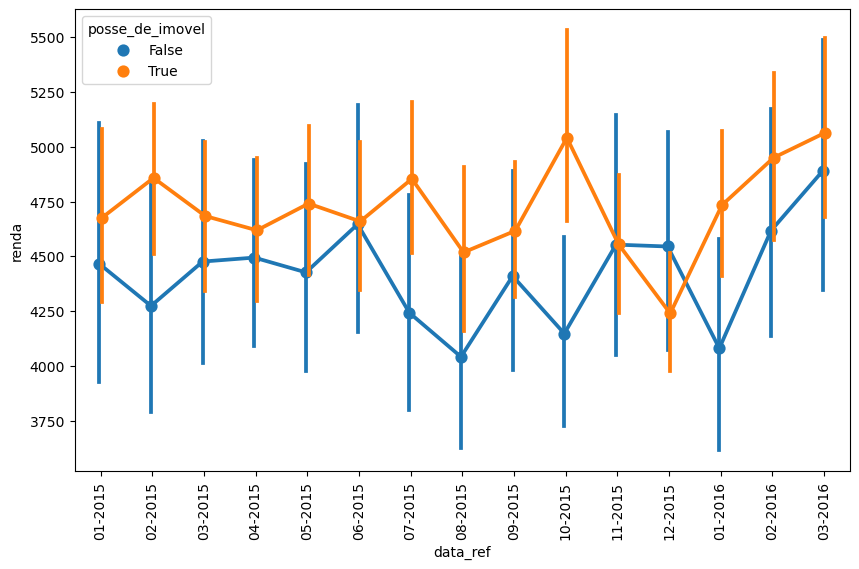

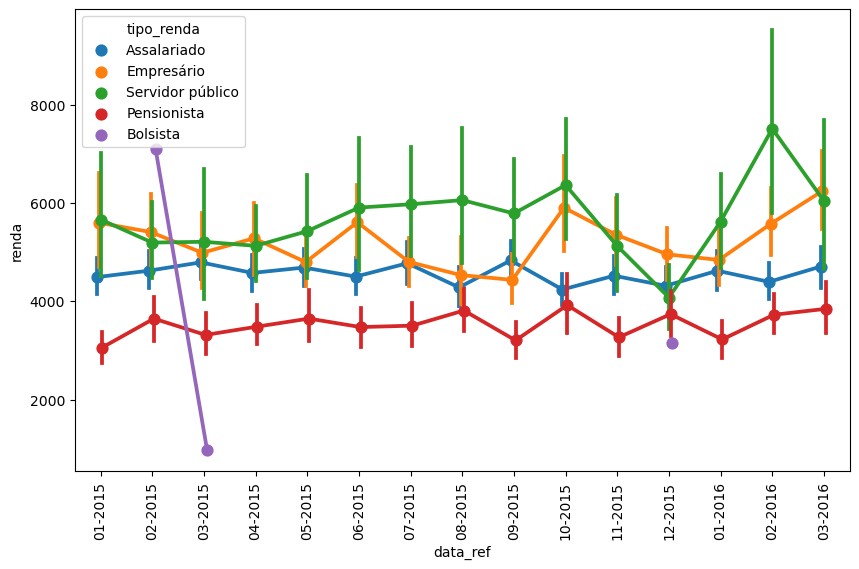

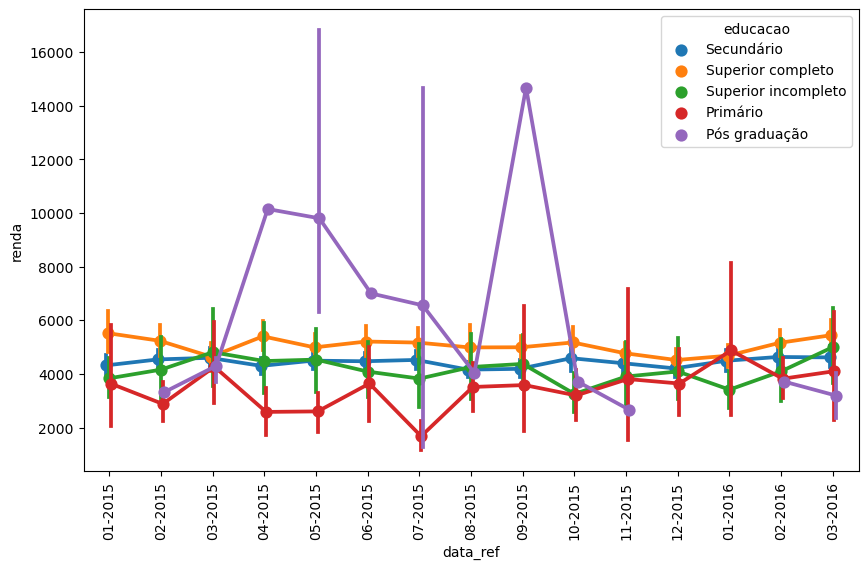

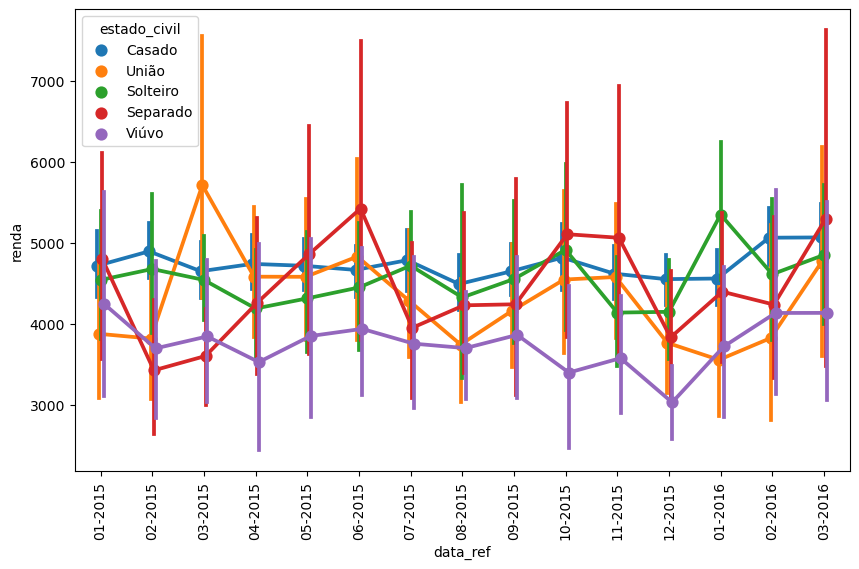

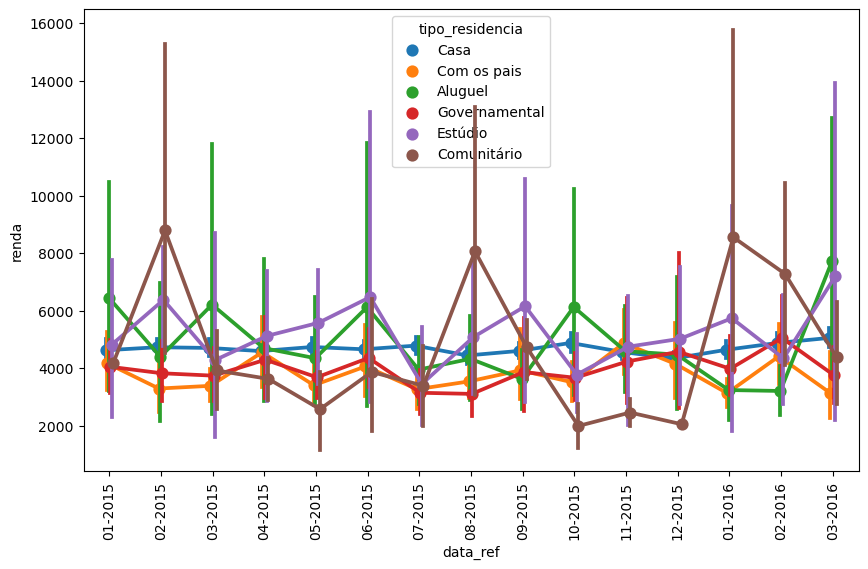

In [75]:
for col in df_1:
    
    plt.rc('figure', figsize=(10,6))
    fig, axes = plt.subplots(1,1)

    ax2 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True)

    labels = ax2.set_xticklabels(tick_labs, rotation=90)

A análise somente pelo pointplot não se demonstra satisfatória para concluir o exercício, principalmente nos últimos gráficos plotados. Desta forma, o gráfico de barras empilhadas pode ajudar.

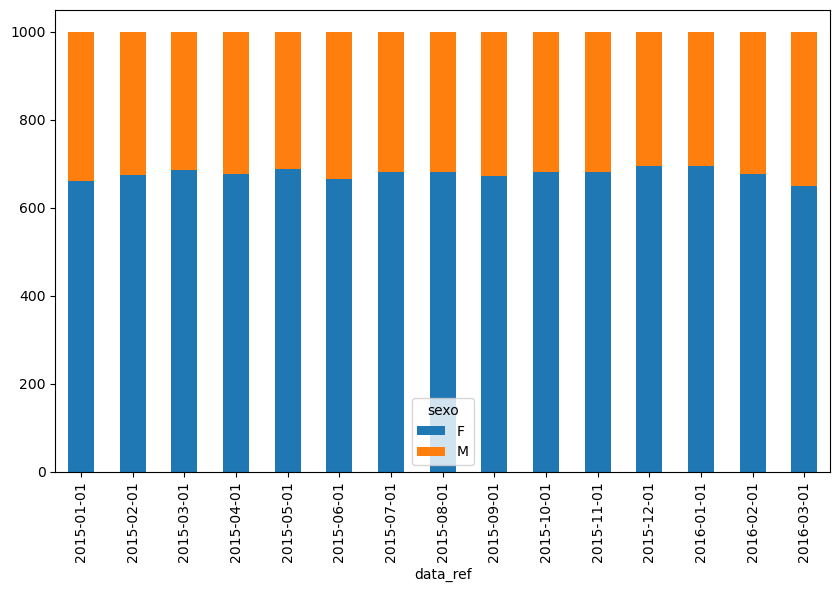

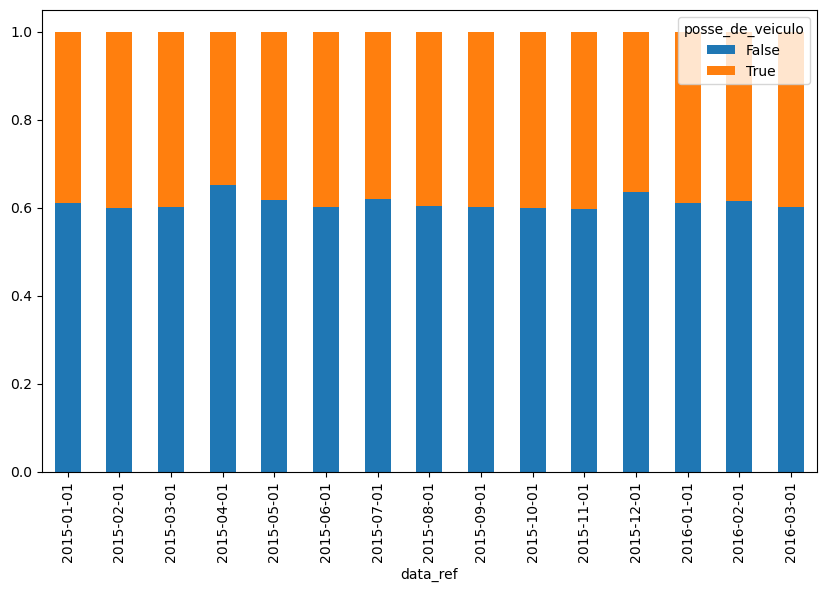

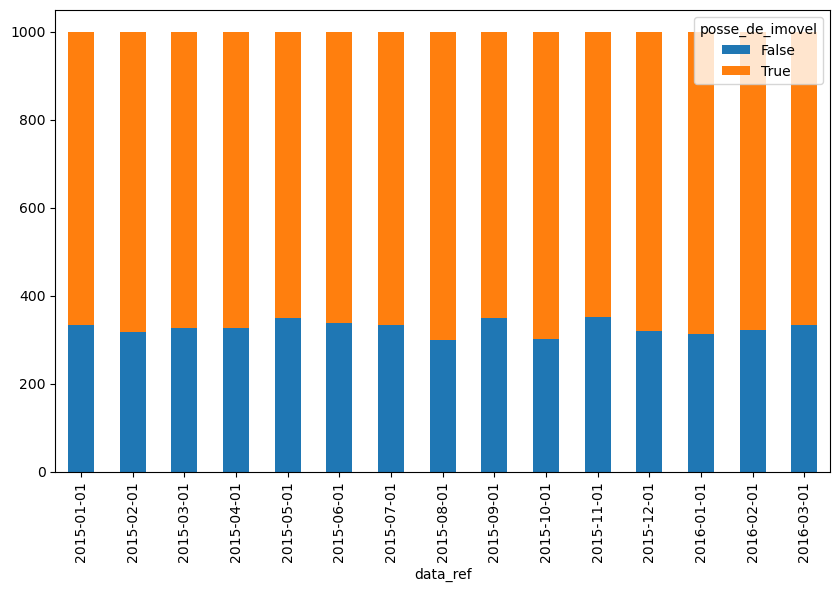

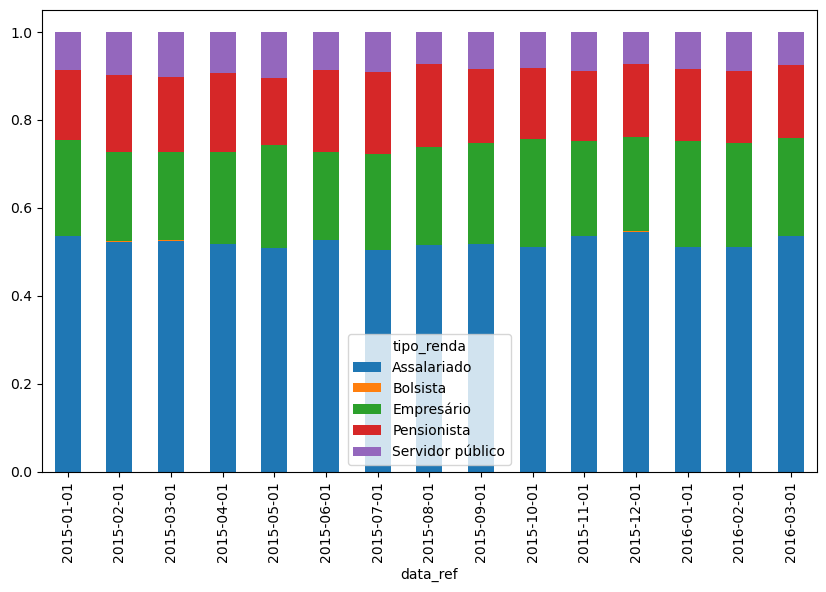

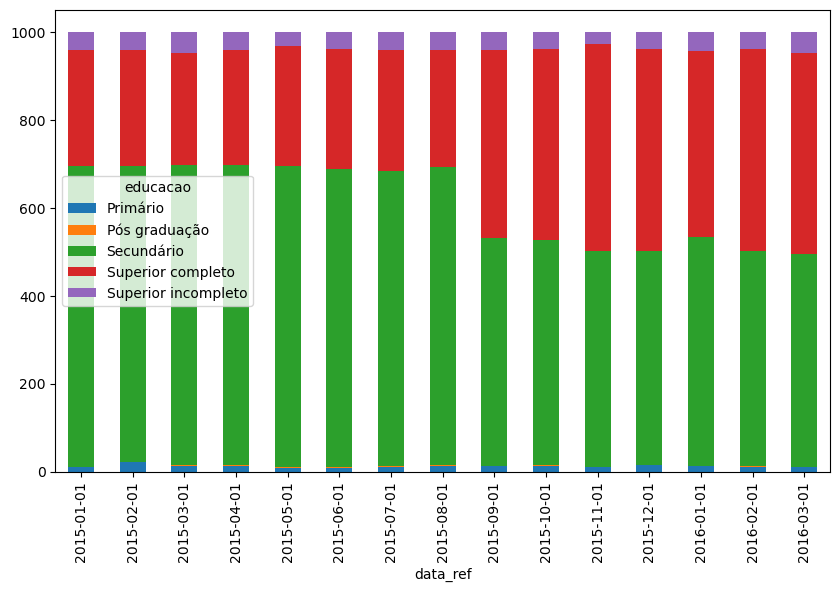

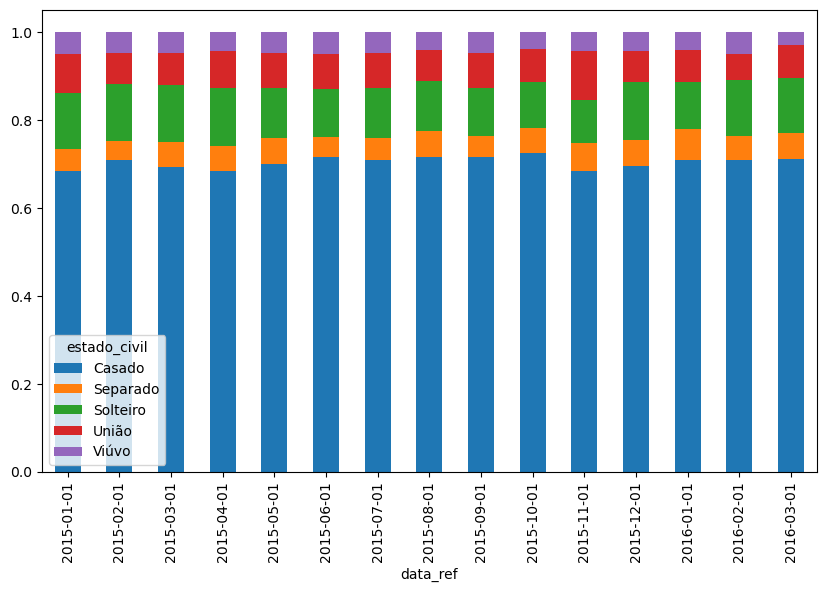

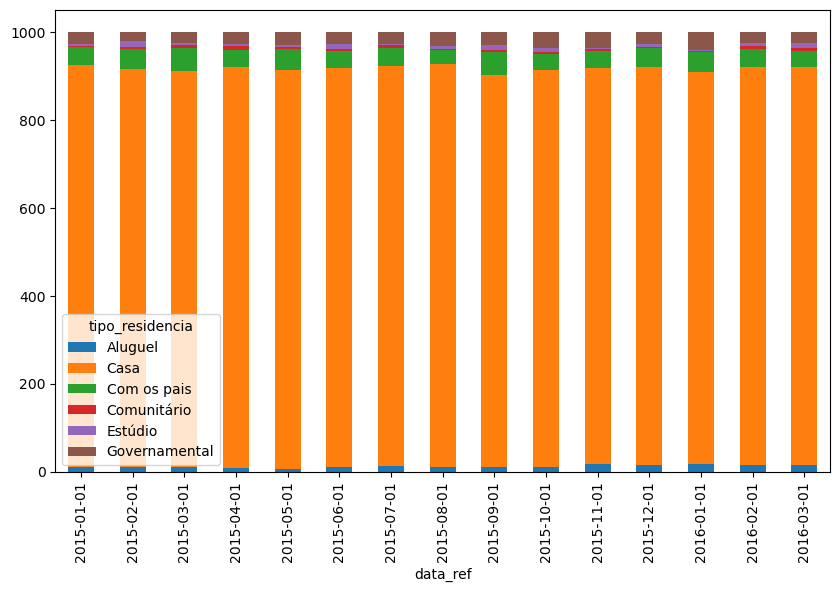

In [85]:
for col in df_1:
    
    tab_freq = pd.crosstab(df['data_ref'],df_1[col])
    tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

    ax = tab.plot.bar(stacked = True)

Novamente, apenas a variável ```educacao``` apresentou mudança significativa ao longo do tempo. Desta forma, penso que todas as demais variáveis estão aptas a serem utilizadas na modelagem.